# Working with more data

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.dates import DateFormatter

import numpy as np
from numpy import NaN

from cassandra.cluster import Cluster
from cassandra.metadata import KeyspaceMetadata

In [3]:
cluster = Cluster(["172.20.16.137"], port=30241)
keyspace_name = "sensorhub"
session = cluster.connect(keyspace_name)

In [4]:
query = "SELECT sensor, datum, temperatureat2meter FROM erti_new WHERE datum >= '2017-01-01 00:00:00' AND  datum <= '2017-12-31 23:59:00' AND sensor=1"
df = pd.DataFrame(list(session.execute(query)))

## Setting useless values to NaN

In [5]:
df['temperatureat2meter'].head()

0   -7.2
1   -7.2
2   -7.1
3   -8.4
4   -7.9
Name: temperatureat2meter, dtype: float64

In [6]:
df['temperatureat2meter'] = df['temperatureat2meter'].replace(to_replace=[-888.8, -777.7, -999.9], value=np.NaN)

## Plot the data to discover missing periods

Text(0, 0.5, 'tempat2m')

<Figure size 432x288 with 0 Axes>

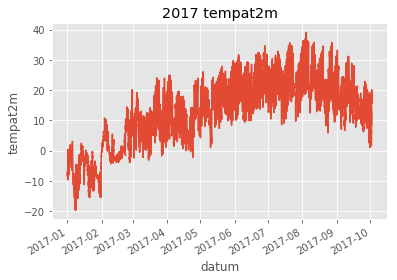

In [7]:
style.use('ggplot')

plt.figure()
my_dates = df['datum']
fig, ax = plt.subplots()

ax.plot(my_dates, df['temperatureat2meter'])

fig.autofmt_xdate()
ax.set_title('2017 tempat2m')

plt.xlabel('datum')
plt.ylabel('tempat2m')

## Checking for the NaN values

In [8]:
df.isnull().values.any()

True

## How does the end of the dataset look like?

In [9]:
print(df.tail())

       sensor               datum  temperatureat2meter
51435       1 2017-12-31 23:10:01                  NaN
51436       1 2017-12-31 23:20:01                  NaN
51437       1 2017-12-31 23:30:01                  NaN
51438       1 2017-12-31 23:40:01                  NaN
51439       1 2017-12-31 23:50:01                  NaN


In [10]:
pd.isnull(df)

,sensor,datum,temperatureat2meter
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


## Does matplotlib automatically fill in missing data? (To make the graph continous)

In [11]:
df['temperatureat2meter'] = df['temperatureat2meter'].replace(to_replace = np.NaN, value = -888.8)

## Graph the result

Text(0, 0.5, 'tempat2m')

<Figure size 432x288 with 0 Axes>

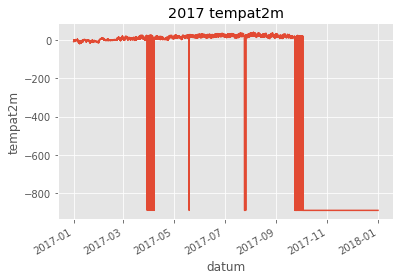

In [12]:
plt.figure()

fig, ax = plt.subplots()

ax.plot(my_dates, df['temperatureat2meter'])
fig.autofmt_xdate()
ax.set_title('2017 tempat2m')

plt.xlabel('datum')
plt.ylabel('tempat2m')

## Create months column

In [14]:
df['date'] = df['datum'].dt.date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

print(df['month'].reset_index().head())

   index  month
0      0      1
1      1      1
2      2      1
3      3      1
4      4      1


## Checking those -888.8 values

In [19]:
res = df.set_index('temperatureat2meter').loc[-888.8]

print(res)

                     sensor               datum       date  month
temperatureat2meter                                              
-888.8                    1 2017-03-30 05:00:01 2017-03-30      3
-888.8                    1 2017-03-30 05:10:01 2017-03-30      3
-888.8                    1 2017-03-30 05:20:01 2017-03-30      3
-888.8                    1 2017-03-30 05:30:01 2017-03-30      3
-888.8                    1 2017-03-31 07:10:01 2017-03-31      3
-888.8                    1 2017-03-31 07:20:01 2017-03-31      3
-888.8                    1 2017-03-31 07:30:01 2017-03-31      3
-888.8                    1 2017-03-31 07:40:01 2017-03-31      3
-888.8                    1 2017-04-02 05:00:01 2017-04-02      4
-888.8                    1 2017-04-02 05:10:01 2017-04-02      4
-888.8                    1 2017-04-02 05:20:01 2017-04-02      4
-888.8                    1 2017-04-02 05:30:01 2017-04-02      4
-888.8                    1 2017-04-02 05:40:01 2017-04-02      4
-888.8    